**Step 1: Load and Inspect the Data**

In [ ]:
# Upload dataset directly from your computer
from google.colab import files
import pandas as pd

uploaded = files.upload()  # choose uber-raw-data-sep14.csv when prompted

# Load dataset (replace with exact uploaded file name if needed)
df = pd.read_csv("uber-raw-data-sep14.csv")

# Quick look
print("Shape:", df.shape)
print(df.head())


Saving uber-raw-data-sep14.csv to uber-raw-data-sep14.csv
Shape: (1028136, 4)
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


In [ ]:
print(df.columns)



Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')


In [ ]:
import pandas as pd

# Load dataset (example with CSV)
df = pd.read_csv("uber-raw-data-sep14.csv")

# Basic info about dataset
print("=== Dataset Info ===")
print(df.info())

# First 5 rows
print("\n=== First 5 Rows ===")
print(df.head())

# Statistical description of numerical columns
print("\n=== Statistical Description ===")
print(df.describe())

# Count of missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Column names
print("\n=== Column Names ===")
print(df.columns.tolist())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB
None

=== First 5 Rows ===
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

=== Statistical Description ===
                Lat           Lon
count  1.028136e+06  1.028136e+06
mean   4.073922e+01 -7.397182e+01
std    4.082861e-02  5.831413e-02
min    3.998970e+01 -7.477360e+01
25%    4.072040e+01 -7.399620e+01
50%    4.074180e+01 -7

**Step 2: Preprocessing**

In [ ]:
# Convert Date/Time to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract useful time-based features
df['hour'] = df['Date/Time'].dt.hour        # hour of day (0-23)
df['day'] = df['Date/Time'].dt.day          # day of month
df['weekday'] = df['Date/Time'].dt.weekday  # 0=Monday, 6=Sunday
df['month'] = df['Date/Time'].dt.month      # month number

# Drop duplicates if they exist
df = df.drop_duplicates()

# Show updated columns
print(df.columns)
print(df.head())


Index(['Date/Time', 'Lat', 'Lon', 'Base', 'hour', 'day', 'weekday', 'month'], dtype='object')
            Date/Time      Lat      Lon    Base  hour  day  weekday  month
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512     0    1        0      9
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512     0    1        0      9
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512     0    1        0      9
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512     0    1        0      9
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512     0    1        0      9


**Step 3: Basic EDA (Exploratory Data Analysis)**

/tmp/ipython-input-1307028392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=df, palette="viridis")


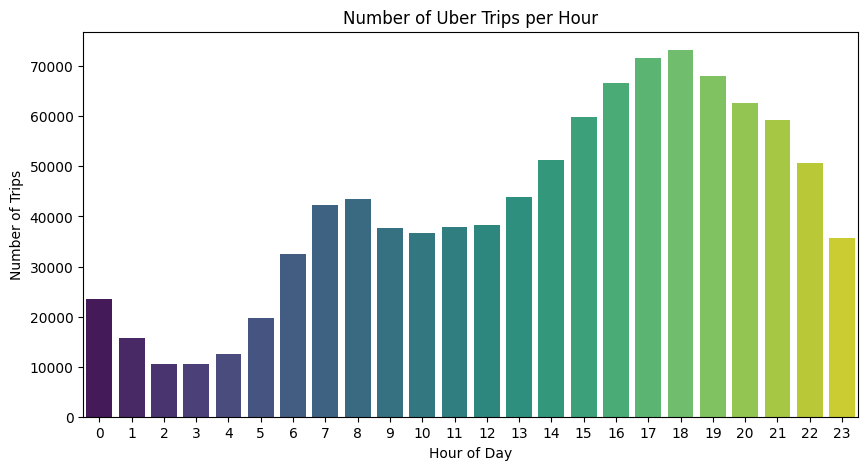

/tmp/ipython-input-1307028392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weekday", data=df, palette="magma")


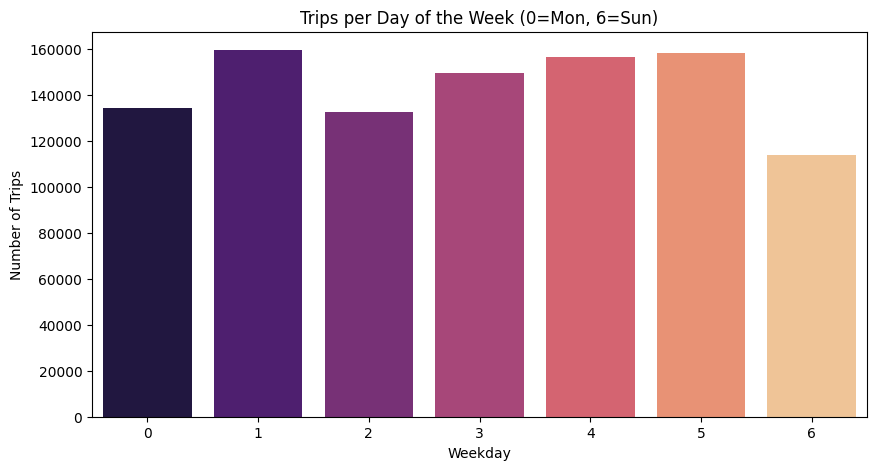

/tmp/ipython-input-1307028392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Base", data=df, palette="coolwarm")


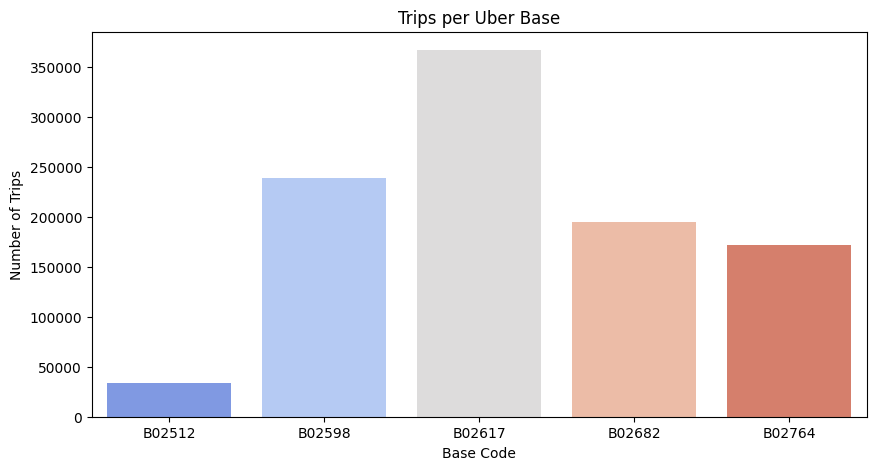

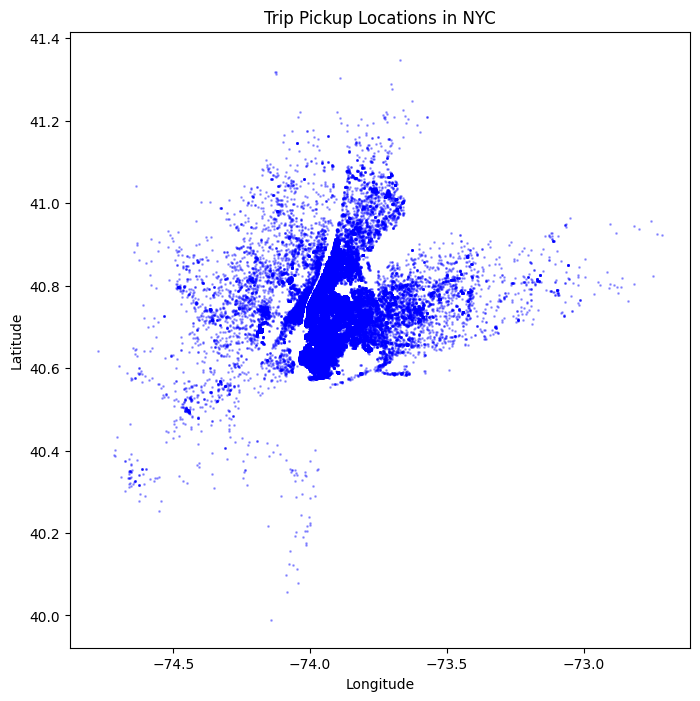

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trips per hour of the day
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df, palette="viridis")
plt.title("Number of Uber Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

# Trips per day of the week
plt.figure(figsize=(10,5))
sns.countplot(x="weekday", data=df, palette="magma")
plt.title("Trips per Day of the Week (0=Mon, 6=Sun)")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.show()

# Trips per base (company code)
plt.figure(figsize=(10,5))
sns.countplot(x="Base", data=df, palette="coolwarm")
plt.title("Trips per Uber Base")
plt.xlabel("Base Code")
plt.ylabel("Number of Trips")
plt.show()

# Sample pickup locations (scatter plot)
plt.figure(figsize=(8,8))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.3, c="blue")
plt.title("Trip Pickup Locations in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


*Step 4: Define Features for Anomaly Detection*

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features for anomaly detection
features = df[['Lat', 'Lon', 'hour', 'day', 'weekday']]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(features)

print("Feature matrix shape:", X.shape)


Feature matrix shape: (1004099, 5)


**Step 5: Isolation Forest (Algorithm 1)**

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)  # 1% anomalies
y_pred_iso = iso.fit_predict(X)

# Add results back to DataFrame
df['anomaly_iso'] = y_pred_iso

# -1 = anomaly, 1 = normal
print(df['anomaly_iso'].value_counts())


anomaly_iso
 1    994068
-1     10031
Name: count, dtype: int64


**Step 6: Visualize Detected Anomalies**

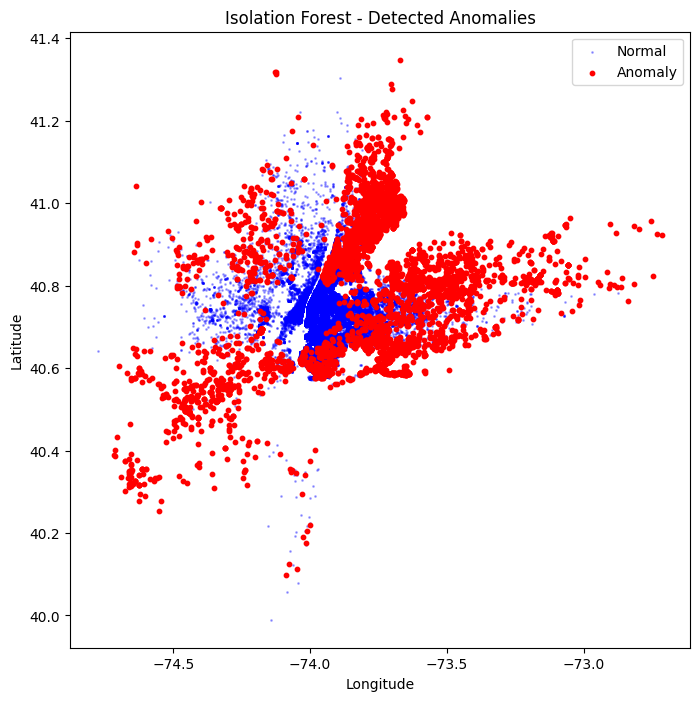

In [ ]:
# Scatter plot of locations, highlighting anomalies
plt.figure(figsize=(8,8))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.3, c="blue", label="Normal")
plt.scatter(df[df['anomaly_iso']==-1]['Lon'],
            df[df['anomaly_iso']==-1]['Lat'],
            s=10, c="red", label="Anomaly")
plt.title("Isolation Forest - Detected Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


**Step 6b: Adjust contamination**

In [ ]:
iso = IsolationForest(contamination=0.005, random_state=42)  # 0.5% anomalies
y_pred_iso = iso.fit_predict(X)
df['anomaly_iso'] = y_pred_iso


**Step 7: Add Local Outlier Factor (LOF)**

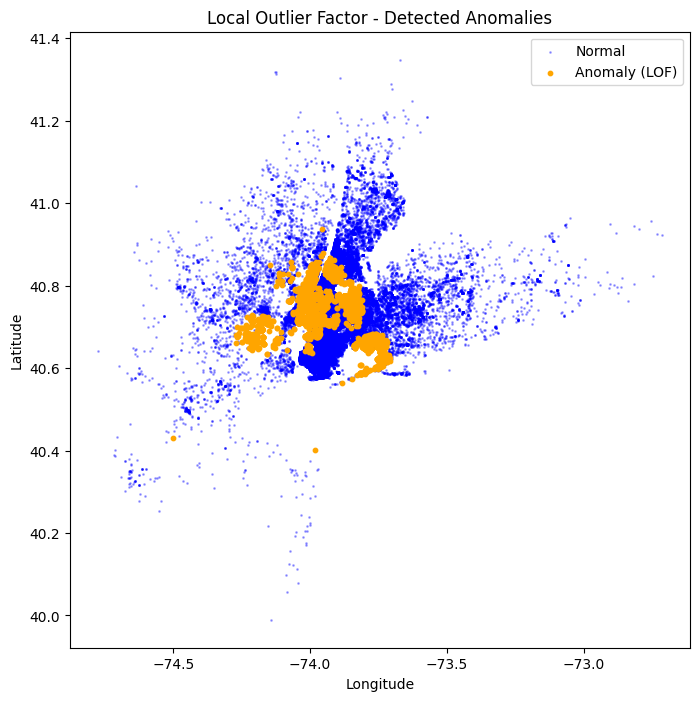

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Train Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Add results back to DataFrame
df['anomaly_lof'] = y_pred_lof

# Plot LOF results
plt.figure(figsize=(8,8))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.3, c="blue", label="Normal")
plt.scatter(df[df['anomaly_lof']==-1]['Lon'],
            df[df['anomaly_lof']==-1]['Lat'],
            s=10, c="orange", label="Anomaly (LOF)")
plt.title("Local Outlier Factor - Detected Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


**Step 8: Compare Isolation Forest vs LOF**

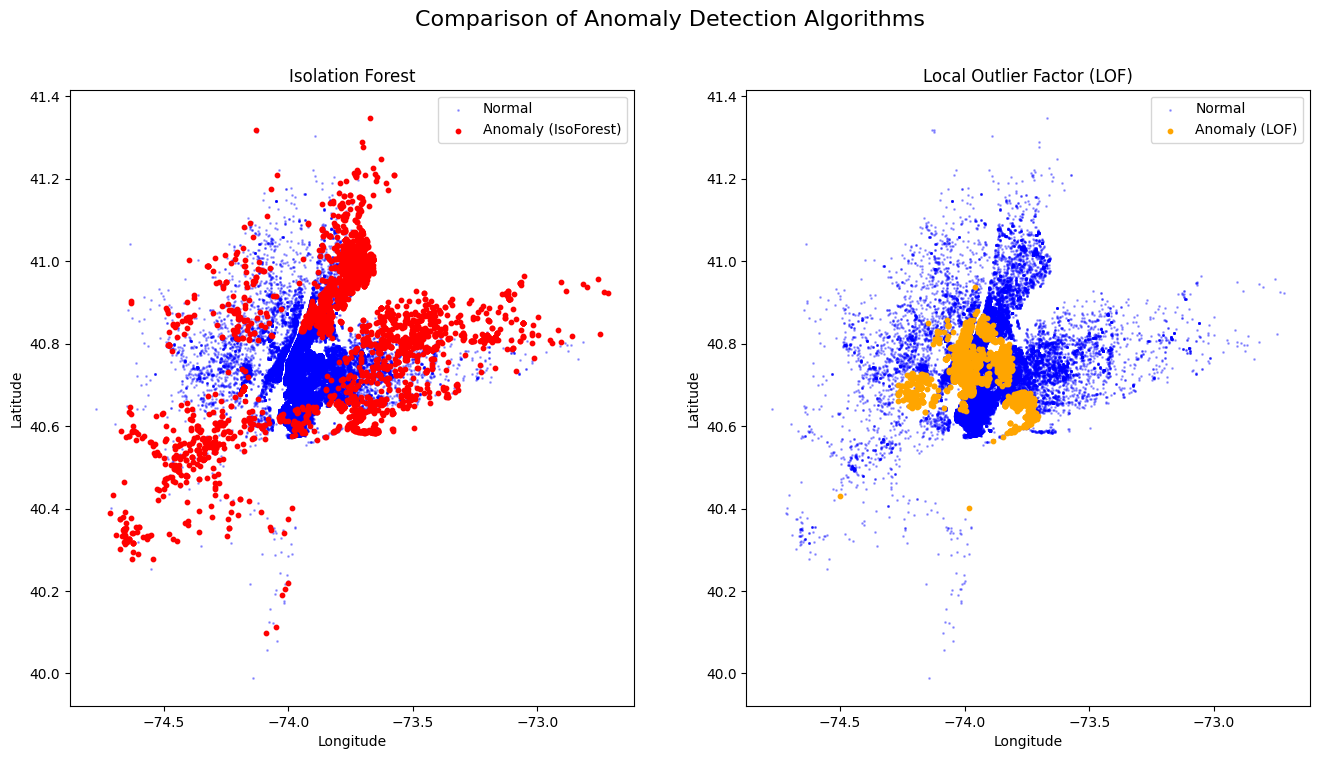

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

# Isolation Forest
axs[0].scatter(df['Lon'], df['Lat'], s=1, alpha=0.3, c="blue", label="Normal")
axs[0].scatter(df[df['anomaly_iso']==-1]['Lon'],
               df[df['anomaly_iso']==-1]['Lat'],
               s=10, c="red", label="Anomaly (IsoForest)")
axs[0].set_title("Isolation Forest")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
axs[0].legend()

# LOF
axs[1].scatter(df['Lon'], df['Lat'], s=1, alpha=0.3, c="blue", label="Normal")
axs[1].scatter(df[df['anomaly_lof']==-1]['Lon'],
               df[df['anomaly_lof']==-1]['Lat'],
               s=10, c="orange", label="Anomaly (LOF)")
axs[1].set_title("Local Outlier Factor (LOF)")
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")
axs[1].legend()

plt.suptitle("Comparison of Anomaly Detection Algorithms", fontsize=16)
plt.show()


**Step 10: Count anomalies detected**

In [ ]:
# Count anomalies
iso_anomalies = sum(df['anomaly_iso'] == -1)
lof_anomalies = sum(df['anomaly_lof'] == -1)

print("Anomalies detected by Isolation Forest:", iso_anomalies)
print("Anomalies detected by LOF:", lof_anomalies)

# Overlap: anomalies flagged by both methods
overlap = sum((df['anomaly_iso'] == -1) & (df['anomaly_lof'] == -1))
print("Anomalies flagged by both methods:", overlap)


Anomalies detected by Isolation Forest: 5021
Anomalies detected by LOF: 10041
Anomalies flagged by both methods: 497
